In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from matplotlib import ticker
import numpy as np
import math

In [2]:
my_data = pd.read_csv("Copia de P11_v03.csv")
my_data

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M
0,0.180657,0.044687,0.337857,0.121369,0.046246,0.963768,0.055556,0.000000,0.492276,0.372180,...,0.276533,0.157972,0.285666,0.725091,0.503002,0.439502,-1,-1,-1,1
1,0.125068,0.029217,0.153315,0.127766,0.012614,0.956522,0.055556,0.000000,0.465976,0.347945,...,0.304293,0.165051,0.265047,0.798878,0.548558,0.558128,-1,-1,-1,1
2,0.067236,0.047671,0.110700,0.072229,0.009782,0.942029,0.027778,0.041667,0.385462,0.298707,...,0.290231,0.154872,0.245263,0.783650,0.526697,0.492128,-1,-1,-1,1
3,0.051801,0.027131,0.080785,0.061386,0.006786,0.920290,0.055556,0.083333,0.342232,0.197797,...,0.276625,0.161893,0.165482,0.819684,0.522696,0.433844,-1,-1,-1,1
4,0.043770,0.037818,0.075433,0.052474,0.009082,0.905797,0.055556,0.083333,0.335874,0.163376,...,0.268977,0.177383,0.116861,0.802314,0.492558,0.343477,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13798,0.060302,0.022121,0.054852,0.064712,0.002763,0.569444,0.057143,0.000000,0.825603,0.488880,...,0.348687,0.424233,0.667751,0.819276,0.215739,0.561085,1,-1,-1,-1
13799,0.041979,0.045272,0.026338,0.054367,0.001405,0.569444,0.028571,0.055556,0.769955,0.435807,...,0.256057,0.374850,0.623462,0.791586,0.147693,0.460031,1,-1,-1,-1
13800,0.004653,0.001765,0.013427,0.009015,0.003381,0.569444,0.028571,0.055556,0.778773,0.477580,...,0.314615,0.367985,0.630853,0.761133,0.152228,0.453634,1,-1,-1,-1
13801,0.000000,0.003991,0.012040,0.002950,0.005204,0.569444,0.057143,0.000000,0.720920,0.391050,...,0.376060,0.409130,0.646751,0.701130,0.201151,0.448981,1,-1,-1,-1


In [3]:
my_data["time"] = my_data.index*3
my_data

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M,time
0,0.180657,0.044687,0.337857,0.121369,0.046246,0.963768,0.055556,0.000000,0.492276,0.372180,...,0.157972,0.285666,0.725091,0.503002,0.439502,-1,-1,-1,1,0
1,0.125068,0.029217,0.153315,0.127766,0.012614,0.956522,0.055556,0.000000,0.465976,0.347945,...,0.165051,0.265047,0.798878,0.548558,0.558128,-1,-1,-1,1,3
2,0.067236,0.047671,0.110700,0.072229,0.009782,0.942029,0.027778,0.041667,0.385462,0.298707,...,0.154872,0.245263,0.783650,0.526697,0.492128,-1,-1,-1,1,6
3,0.051801,0.027131,0.080785,0.061386,0.006786,0.920290,0.055556,0.083333,0.342232,0.197797,...,0.161893,0.165482,0.819684,0.522696,0.433844,-1,-1,-1,1,9
4,0.043770,0.037818,0.075433,0.052474,0.009082,0.905797,0.055556,0.083333,0.335874,0.163376,...,0.177383,0.116861,0.802314,0.492558,0.343477,-1,-1,-1,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13798,0.060302,0.022121,0.054852,0.064712,0.002763,0.569444,0.057143,0.000000,0.825603,0.488880,...,0.424233,0.667751,0.819276,0.215739,0.561085,1,-1,-1,-1,41394
13799,0.041979,0.045272,0.026338,0.054367,0.001405,0.569444,0.028571,0.055556,0.769955,0.435807,...,0.374850,0.623462,0.791586,0.147693,0.460031,1,-1,-1,-1,41397
13800,0.004653,0.001765,0.013427,0.009015,0.003381,0.569444,0.028571,0.055556,0.778773,0.477580,...,0.367985,0.630853,0.761133,0.152228,0.453634,1,-1,-1,-1,41400
13801,0.000000,0.003991,0.012040,0.002950,0.005204,0.569444,0.057143,0.000000,0.720920,0.391050,...,0.409130,0.646751,0.701130,0.201151,0.448981,1,-1,-1,-1,41403


In [4]:
def distance(x, y, z):
    return math.sqrt(x**2 + y**2 + z**2)

my_data['Distancia'] = my_data.apply(lambda row: distance(row['Des_x'], row['Des_y'], row['Des_z']), axis=1)

my_data['Distancia'] 

0        0.361962
1        0.199972
2        0.132541
3        0.101688
4        0.092337
           ...   
13798    0.084877
13799    0.060427
13800    0.016522
13801    0.013444
13802    0.020270
Name: Distancia, Length: 13803, dtype: float64

In [5]:
# Filtramos solo las columnas numéricas para estandarizar
numeric_cols = my_data.select_dtypes(include=['number']).columns

# Estandarización de las columnas numéricas
scaler = StandardScaler()
my_data_normalized = pd.DataFrame(scaler.fit_transform(my_data[numeric_cols]), columns=numeric_cols)

# Contar cruces por cero para cada columna
cross_zero_counts = {}
for col in my_data_normalized.columns:
    # Contar cruces por cero (un cambio de signo entre valores consecutivos)
    cross_zero_counts[col] = ((my_data_normalized[col].shift(1) * my_data_normalized[col]) < 0).sum()

# Convertir el resultado en un DataFrame
df_cross_zero_counts = pd.DataFrame(list(cross_zero_counts.items()), columns=['Column', 'Zero_Crossings'])

# Mostrar el resultado
df_cross_zero_counts


,Column,Zero_Crossings
0,Veloc,2825
1,Acele,4028
2,Des_x,3451
3,Des_y,2845
4,Des_z,2043
5,Presn,3134
6,VelPr,2634
7,AcePr,4630
8,F5EEX,1700
9,F6EES,1694


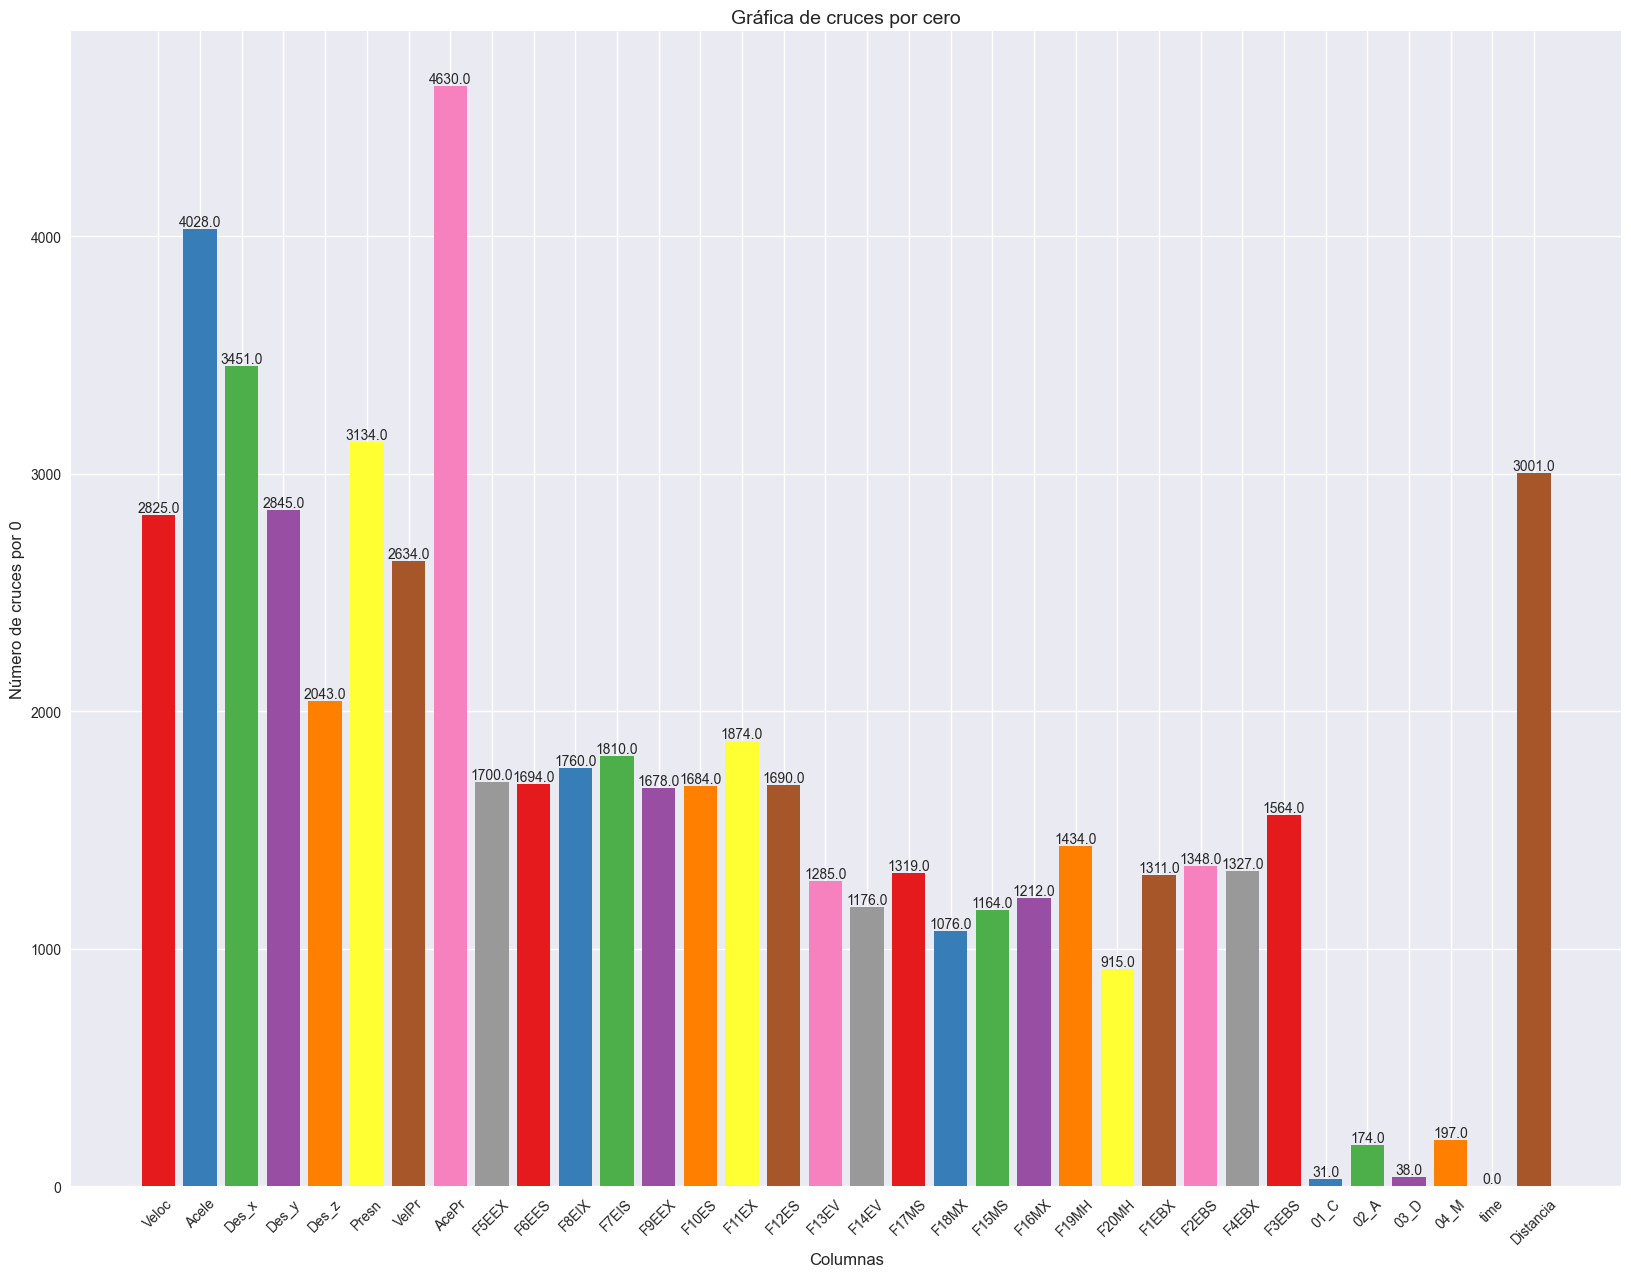

In [6]:
plt.figure(figsize=(20, 15))

# Crear la gráfica de barras
plt.style.use('seaborn-v0_8')  
# Gráfica de barras
colors = plt.get_cmap("Set1").colors  # Usamos la paleta Set2 para colores suaves y equilibrados

bars = plt.bar(df_cross_zero_counts['Column'], df_cross_zero_counts['Zero_Crossings'], color=colors[:len(df_cross_zero_counts)])
# Rotar las etiquetas del eje X
plt.xticks(rotation=45)

# Añadir etiquetas y título
plt.xlabel("Columnas", fontsize=12)
plt.ylabel("Número de cruces por 0", fontsize=12)
plt.title("Gráfica de cruces por cero", fontsize=14)

# Mostrar el valor encima de cada barra
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.1f}',
        ha='center', va='bottom'
    )

plt.show()

/var/folders/zc/0810pbdx27g4bxf79h2cbnf40000gn/T/ipykernel_10231/2459988011.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_sorted['Column'], rotation=45, ha='right')


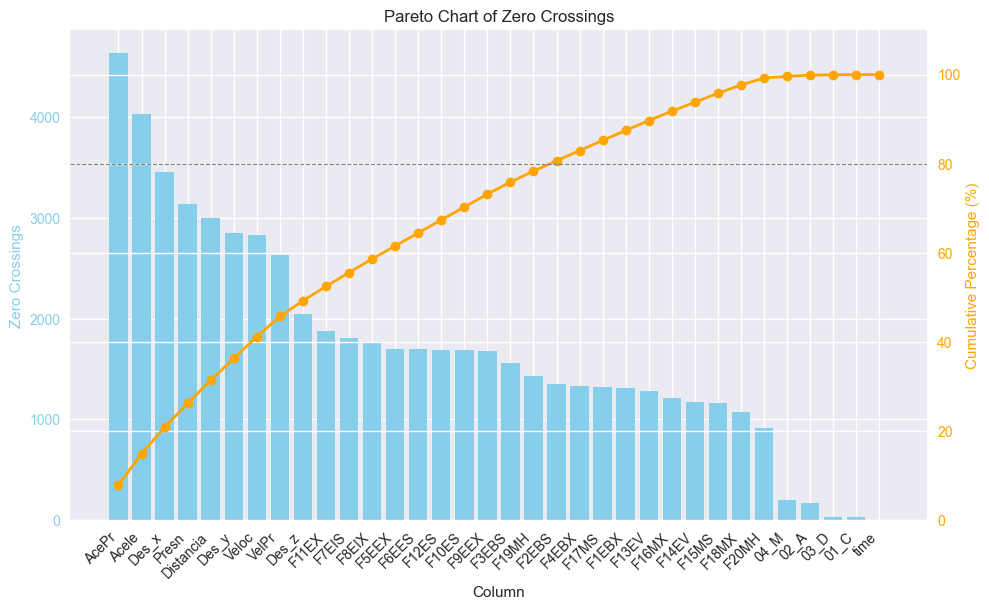

In [7]:
# Ordenar los datos en orden descendente por 'Zero_Crossings'
df_sorted = df_cross_zero_counts.sort_values(by='Zero_Crossings', ascending=False).reset_index(drop=True)

# Calcular el porcentaje acumulativo
df_sorted['Cumulative_Percentage'] = df_sorted['Zero_Crossings'].cumsum() / df_sorted['Zero_Crossings'].sum() * 100

# Crear la gráfica de Pareto
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar las barras de conteo de cruces por cero
bars = ax1.bar(df_sorted['Column'], df_sorted['Zero_Crossings'], color='skyblue', label='Zero Crossings')
ax1.set_xlabel('Column')
ax1.set_ylabel('Zero Crossings', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Rotar las etiquetas del eje X
ax1.set_xticklabels(df_sorted['Column'], rotation=45, ha='right')

# Crear un segundo eje Y para la línea de porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(df_sorted['Column'], df_sorted['Cumulative_Percentage'], color='orange', marker='o', linestyle='-', linewidth=2, label='Cumulative Percentage')
ax2.set_ylabel('Cumulative Percentage (%)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.set_ylim([0, 110])  # Asegura que el límite superior permita que la línea llegue hasta 100%

# Agregar línea de referencia en 80%
ax2.axhline(80, color='grey', linestyle='--', linewidth=0.8)

# Mostrar leyendas
fig.tight_layout()
plt.title('Pareto Chart of Zero Crossings')
plt.show()
